# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Read dataframe

In [ ]:
# Folder where partitioned CSVs are located
folder_path = '/content/'

# Pattern to match all part files
parts = glob.glob(folder_path + 'part-*.csv')

# Load and concatenate all CSVs
df_original = pd.concat([pd.read_csv(part) for part in parts], ignore_index=True)

<ipython-input-4-5c995b10d6a3>:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.concat([pd.read_csv(part) for part in parts], ignore_index=True)
<ipython-input-4-5c995b10d6a3>:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.concat([pd.read_csv(part) for part in parts], ignore_index=True)
<ipython-input-4-5c995b10d6a3>:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.concat([pd.read_csv(part) for part in parts], ignore_index=True)
<ipython-input-4-5c995b10d6a3>:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.concat([pd.read_csv(part) for part in parts], ignore_index=True)
<ipython-input-4-5c995b10d6a3>:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=F

In [ ]:
# Copy the dataframe
df = df_original.copy()

In [ ]:
# View sample data
df.head()

,station_id,variable,value,date,latitude,longitude,elevation,country_code,state,station_name
0,USC00047965,TMAX,156,2019-01-01,38.4558,-122.7133,5,CA,SAN,TA ROSA
1,USC00047965,TMIN,61,2019-01-01,38.4558,-122.7133,5,CA,SAN,TA ROSA
2,USC00047965,TOBS,122,2019-01-01,38.4558,-122.7133,5,CA,SAN,TA ROSA
3,USC00047965,PRCP,0,2019-01-01,38.4558,-122.7133,5,CA,SAN,TA ROSA
4,USC00128437,TMAX,28,2019-01-01,41.7006,-86.2486,21,IN,S B,END


In [ ]:
print(df["country_code"].unique())

['CA' 'IN' 'DE']


In [ ]:
df.sample(10)

,station_id,variable,value,date,latitude,longitude,elevation,country_code,state,station_name
2144693,USC00048999,TMIN,172,2018-07-01,37.6819,-121.3467,4,CA,TRA,CY CARBONA
1061463,USW00023129,RHMX,44,2018-11-14,33.8117,-118.1472,1,CA,LON,G BEACH DAUGHERTY AP
1123940,USW00093817,PRCP,0,2018-10-27,38.0503,-87.5147,12.0,IN,EVA,NSVILLE RGNL AP GS
2833227,USW00003167,TMIN,156,2018-06-08,33.9236,-118.3328,1.0,CA,HAW,THORNE MUNI AP
677926,USC00122814,SNWD,0,2019-06-03,39.2425,-87.3906,16,IN,FAR,MERSBURG TV-2
1463393,USW00023277,PRCP,0,2018-04-20,36.9394,-121.7900,4,CA,WAT,SONVILLE MUNI AP
444749,US1DENC0032,PRCP,0,2018-09-04,39.7526,-75.5600,4,DE,WIL,MINGTON 2.0 NW
1787580,US1CASA0002,PRCP,0,2018-12-29,38.6350,-121.3611,2,CA,SAC,RAMENTO 8.0 NE
1926160,USC00128290,TOBS,-11,2019-03-03,39.2839,-86.7706,16,IN,SPE,NCER
2172368,USC00072730,PRCP,0,2018-07-20,39.1467,-75.5056,NaN,DE,DOV,ER


In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856506 entries, 0 to 2856505
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   station_id    object 
 1   variable      object 
 2   value         int64  
 3   date          object 
 4   latitude      float64
 5   longitude     float64
 6   elevation     object 
 7   country_code  object 
 8   state         object 
 9   station_name  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 217.9+ MB


#Delete duplicate and null values

In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [ ]:
#Check number of nulls per column
df.isnull().sum()

,0
station_id,0
variable,0
value,0
date,0
latitude,0
longitude,0
elevation,161420
country_code,0
state,0
station_name,3204


In [ ]:
# Impute nulls in 'elevation' with average
df['elevation'] = pd.to_numeric(df['elevation'], errors='coerce')
mean_elevation = df['elevation'].mean()
df['elevation'] = df['elevation'].fillna(mean_elevation)

In [ ]:
# Verify there`s no nulls
df['elevation'].isnull().sum()

np.int64(0)

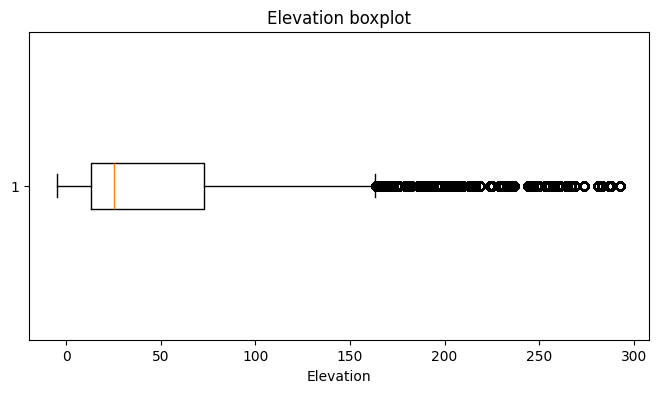

In [ ]:
# Create figure
plt.figure(figsize=(8, 4))

# Draw boxplot only from column 'elevation'
plt.boxplot(df['elevation'].dropna(), vert=False)

# Labels
plt.title('Elevation boxplot')
plt.xlabel('Elevation')

# Show the graph

plt.show()

In [ ]:
# Tukey's limits Calculation
q1 = df['elevation'].quantile(0.25)
q3 = df['elevation'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# See how many outliers there are
outliers = df[(df['elevation'] < lower_bound) | (df['elevation'] > upper_bound)]
print(f"Total outliers: {outliers.shape[0]}")

df_cleaned = df[(df['elevation'] >= lower_bound) & (df['elevation'] <= upper_bound)]


Total outliers: 261717


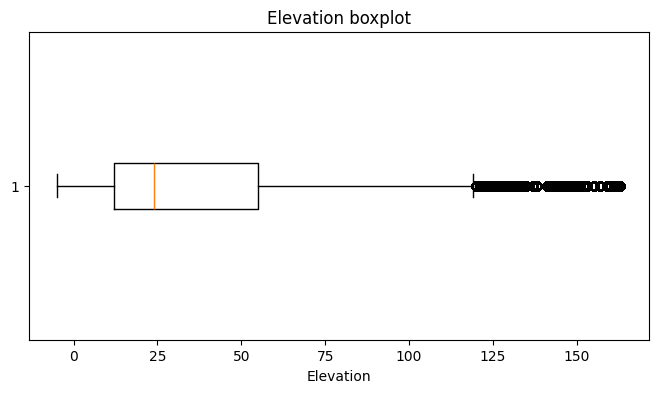

In [ ]:
# Create figure
plt.figure(figsize=(8, 4))

# Draw boxplot only from column 'elevation'
plt.boxplot(df_cleaned['elevation'].dropna(), vert=False)

# Labels
plt.title('Elevation boxplot')
plt.xlabel('Elevation')

# Show the graph

plt.show()

In [ ]:
df_cleaned['station_name'] = df['station_name'].fillna("Unknown Station")

<ipython-input-15-dc4c6c222af2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['station_name'] = df['station_name'].fillna("Unknown Station")


In [ ]:
#Check number of nulls per column
df_cleaned.isnull().sum()

,0
station_id,0
variable,0
value,0
date,0
latitude,0
longitude,0
elevation,0
country_code,0
state,0
station_name,0


In [ ]:
# Save as CSV
df_cleaned.to_csv('/content/df_cleaned.csv', index=False)

# Download the file
from google.colab import files
files.download('/content/df_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>